# Introduction to Function Approximation and Deep Neural Networks

## CSCI E-82A

## Stephen Elston

## 1.0 Overview

This lesson introduces you to the basics of function approximation using linear models and neural networks in the form of deep forward networks. This architecture is the quintessential deep neural net architecture. In this lesson you will learn the following:

- Linear function approximation.
- The problem with over-fitting in function approximation.
- Why is deep learning important and how it relates to representation, learning and inference.
- How a basic Preceptron works.
- Understand why nonlinear activation is important and why rectified linear units are a good choice.
- How to apply different types of loss functions. 
- How back propagation works, and how you apply the chain rule of calculus to determine gradient. 
- Understand the architectural trade-off between depth and width in deep networks.
- Basics of optimization algorithms for machine learning.

The Suggested reading for this lesson is from **Chapter 6: Deep Forward Networks**  and **Chapter 7:** in GBC. Specially:  
- 6.0
- 6.1
- 6.2
- 6.2.1
- 6.2.2
- 6.2.2.1
- 6.2.2.2
- 6.2.2.3
- 6.3
- 6.3.1
- 6.3.2
- 6.4
- 6.5
- 6.5.1
- 6.5.2
- 6.5.3
- 6.5.4,
- 6.5.5
- 6.5.6
- 6.5.7. 
- 7.0
- 7.1 
- 7.2
- 7.3
- 7.4
- 7.5
- 7.8
- 7.11
- 7.12
- 8.0
- 8.1
- 8.1.1
- 8.1.3
- 8.2
- 8.2.1
- 8.2.2
- 8.2.3
- 8.2.4
- 8.2.5
- 8.2.7
- 8.2.8
- 8.3
- 8.3.1
- 8.3.2
- 8.4
- 8.5
- 8.5.1
- 8.5.2 
- 8.5.3
- 8.5.4

### 1.1 Why is deep learning important?

Deep learning methods are a form of **artificial intelligence (AI)** or **machine intelligence**. More specifically, deep learning algorithms are a type of **machine learning**. 

What properties does machine intelligence require? There have been many answers to this question over the history of computing. In this case, we will take a practical view, sometimes known as **weak AI**. There are three key properties an intelligent machine must have. Deep learning algorithms are one of a few classes of algorithms that can do the following, essential to machine intelligence:

1. **Representation:** An intelligent machine must be able to represent a model of the world it interacts with in a general manner. Representation is key to intelligence. Without a good representation the best learning and inference algorithms will struggle. Whereas, good representation can greatly facilitate learning and inference. In conventional machine learning the representation is model and a set of features. The representation is limited to what the features can provide directly. Deep learning algorithms, on the other hand, learn learn complex representations from raw features. This behavior allows deep learning algorithms to approximate complex relationships. Further, the representations learned often generalize well, up to a point. 
2. **Learning:** As you likely guessed from the very name, deep learning algorithms learn from data. Whereas, conventional machine learning is focused on inference,deep learning algorithms learn both inference and representations. As a result, deep leaning algorithms are more complex and therefore harder to train than conventional machine learning algorithms.  
3. **Inference:** Any machine intelligence algorithm must be able to perform inference. The inference is the result produced given new input data. To be useful, the inferences produced by a machine intelligence algorithm must **generalize** beyond the cases used for learning or training. Good generalization requires both good representations and learning which can deal with the complexity of diverse situations. Some deep learning algorithms can approach human levels of performance in inference tasks such as recognizing objects in images or understanding natural speech. 

The figure below shows a highly abstracted view of machine intelligence, showing the relationship between representation, learning and inference. In simple terms, the representation is learned and then used to make inferences. Errors in the inferences can be used to improve the learning of the representation.   

![](img/MachineIntelligence.jpg)


<center>**Figure 1.1**
**Schematic for creating machine intelligence**</center>

**That's it!** The entire rest of this course will focus on just these three points: representation, learning and inference!

## 2.0 Forward propagation: The representation problem

To create useful neutral network we need a **representation** that has two important properties.   

First, there needs to be a way to represent complex functions of the input. Without this property, nothing is gained, since there are numerous machine learning algorithms that work with simple representations. We will spend the rest of this section exploring this problem.   

Second, the representation needs to be learnable. Quite obviously, no machine intelligence representation is useful if there is not a practical algorithm to learn it. We will take up this problem in another section. 

### 2.1 Linear networks

Let's start with the simplest possible network. It has inputs, and an output. The output is a **afine transformation** of the input values. We say this network performs an afine transformation since there is a bias term $b$. 

![Simple Linear Network](img/LinearNetwork.jpg)

<center>**Figure 2.1**
**A simple afine network**</center>

This output $y$ of this network is just:

$$y = f(x) = \sum_i w_i \cdot x_i + b$$

This network performs linear regression. Being able to perform only afine transformations, it can't do anything else. 

This representation is certainly learnable. However, it does not gain us anything over other methods. 

### 2.2 Demonstration of over-parameterizaton in function approximation

Let's try a simple example of function approximation. We will construct a regression models with different numbers of parameters and therefore different model capacities. 

As a first step, we will create a simple single regression model of some synthetic data. The code in the cell below creates some data computed from a straight line but with considerable Normally distributed random noise. A plot is then created of the result. Execute this code and examine the resulting plot.  

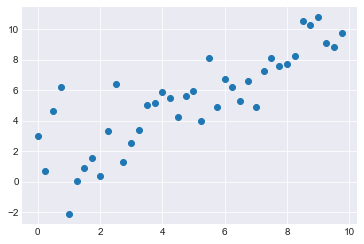

In [55]:
%matplotlib inline
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from numpy.random import normal, seed
import sklearn.linear_model as slm
from sklearn.preprocessing import scale
import sklearn.model_selection as ms

seed(34567)
x = np.arange(start = 0.0, stop = 10.0, step = 0.25) 
y = np.add(x, normal(scale = 2.0, size = x.shape[0]))

plt.scatter(x,y)

Notice that the data fall approximately on a straight line, but with significant deviations. 

Next, we will compute a simple single regression model. This model has an intercept term and a single parameter. The code in the cell below splits the data into randomly selected training and testing subsets. Execute this code.

In [56]:
indx = range(len(x))
seed(9988)
indx = ms.train_test_split(indx, test_size = 20)
x_train = np.ravel(x[indx[0]])
y_train = np.ravel(y[indx[0]])
x_test = np.ravel(x[indx[1]])
y_test = np.ravel(y[indx[1]])

Next, we will use the linear model in 'sklearn.linear_model' package to create a single regression model for these data. The code in the cell below does just this, prints the single model coefficient and plots the result. Execute this code. 

***
**Note:** you can find documentation along with some examples of scikit-learn regression models on the [regression models pages](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
***

[2.18028763]
1.2214941652952345


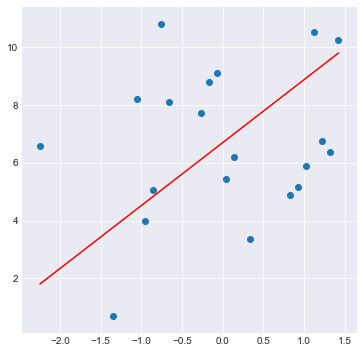

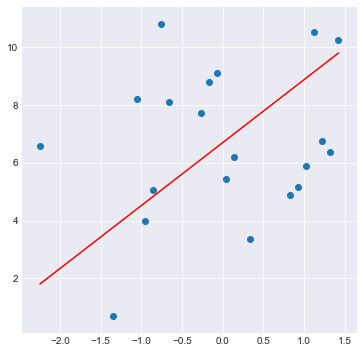

In [57]:
def plot_reg(x, y_score, y):
    ax = plt.figure(figsize=(6, 6)).gca() # define axis
    
    ## Get the data in plot order
    xy = sorted(zip(x,y_score))
    x = [x for x, _ in xy]
    y_score = [y for _, y in xy]

    ## Plot the result
    plt.plot(x, y_score, c = 'red')
    plt.scatter(x, y)

def reg_model(x, y):
    mod = slm.LinearRegression()
    x_scale = scale(x)  # .reshape(-1, 1)
    mod.fit(x_scale, y)
    print(mod.coef_)
    print(test_mod(x, y, mod))
    return mod, x_scale, mod.predict(x_scale)

mod, x_scale, y_hat = reg_model(x_train.reshape(-1, 1), y_train)

plot_reg(x_scale, y_hat, y_train)

Examine these results. Notice that the single coefficient (slope) seems reasonable. Visually, the fit to the data looks reasonable. 

We should also test the fit to some test data. The code in the cell does just this and returns the RMS error. execute this code.

1.9292639905624638

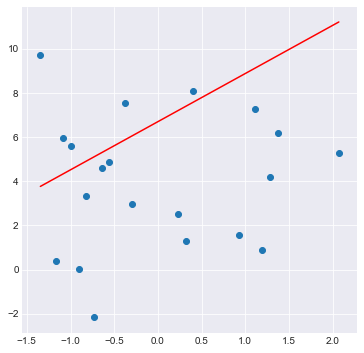

In [58]:
from math import sqrt
def test_mod(x,y, mod):
    x_scale = scale(x)
    y_score = mod.predict(x_scale)
    plot_reg(x_scale, y_score, y)
    return np.std(y_score - y)

test_mod(x_test.reshape(-1, 1), y_test, mod)

Again, these results look reasonable. The RMSE is also reasonable given the significant dispersion in these data. 

Now, let's try a model with significantly higher capacity. In this case we compute new features for a 9th order polynomial model. Using this new set of features a new regression model is trained and a summary displayed. 

[    3801.79377101   -55910.91605895   340393.61244177 -1135034.00389994
  2291726.97962741 -2884767.48230414  2217807.98144177  -954167.45864495
   176179.90377912]
0.7329681695593488


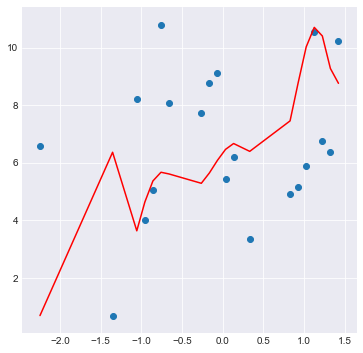

In [59]:
seed(2233)
x_power = np.power(x_train.reshape(-1, 1), range(1,10))
x_scale = scale(x_power)

mod_power = slm.LinearRegression()
mod_power.fit(x_scale, y_train)
y_hat_power = mod_power.predict(x_scale)

plot_reg(x_scale[:,0], y_hat_power, y_train)

print(mod_power.coef_)
print(np.std(y_hat_power - y_train))

Notice the following, indicating the the model is quite over-fit. 
- The coefficient values are over a wide range ($10^7$). This in contrast to the coefficient of the single regression model which had a reasonable single digit value.
- The graph of the fitted model shows highly complex behavior. 

Now, we will try to test the model with the held-back test data. The code in the cell below creates the same features and applies the `predict` method to the model using these test features. 

1005937.9130351634


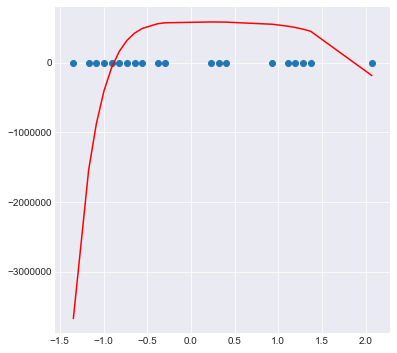

In [60]:
x_test_scale = scale(x_test.reshape(-1, 1)) # Prescale to prevent numerical overflow. 
x_test_power = np.power(x_test_scale, range(1,10))
x_scale_test = scale(x_test_power)

y_hat_power = mod_power.predict(x_scale_test)

plot_reg(x_scale_test[:,0], y_hat_power, y_test)

print(np.std(y_hat_power - y_test))

This is clearly a terrible fit! The RMSE is enormous and the curve of predicted values bears little resemblance to the test values. Indeed, this is a common problem with over-fit models that the errors grow in very rapidly toward the edges of the training data domain.

## 3.0 The preceptron

To get started with neural networks, let's have a look at a simple **preceptron** model. The perceptron was proposed by Rosenblatt (1962). He built on the earlier attempts at a neural network models by McCulloch and Pitts (1943) and Heeb (1949). The perceptron adds **nonlinear activation** to the afine network. 

![](img/Preceptron.jpg)

<center>**Figure 2.2 Schematic of perceptron with nonlinear activation**</center>

The output $y$ of the perceptron is given by the following:

$$y = f(x) = \sigma \Big( \sum_i w_i \cdot x_i + b \Big)$$

The output of the network is now nonlinear, give the **activation function** $\sigma(x)$. 

But, the preceptron is nothing more than a logistic regression classifier. The fact that the preceptron could only solve linearly separable problems was pointed out by [Minsky and Papert (1969)](https://en.wikipedia.org/wiki/Perceptrons_(book)). The failure of the preceptron to learn an **exclusive or (XOR)** function is well known, but created a significant controversy at the time. See for example, Section 6.1 in GBC. 

Again, this representation is certainly learnable. However, as before, it does not gain us anything over other methods.

## 4.0 Forward networks - We'r gonna need a better representation!

The problem with the simple perceptron is one of representations. There is no way that this simple network can represent anything but a linearly separable function. To represent more complex functions, we need a more complex network. 

What we need is a network with layers of **hidden nodes**. The figure below shows a simple example of a neural network with one hidden **hidden layer** with two nodes. Since every node (including inputs) is connected to every other node we call this architecture a **fully connected neural network**.

![](img/Hidden.jpg)

<center>**Figure 2.3  
Fully connected neural network with single hidden layer**</center>

Let's walk through some aspects of these diagrams. 

1. The neural network is divided into three layers. The input layer, the hidden layer and the output layer. 
2. The values in the input layer are multiplied by a weight matrix, $W^1$.
3. The nodes in the hidden layer sum their inputs and add a bias term, $b^1$. 
4. The outputs of the hidden layer nodes are multiplied by a weight vector, $W^2$.
5. The output layer sums the inputs and adds another bias term, $b^2$.

### 4.1 Neural network architectures - Finding representations

The representations achievable by neural network with just a single hidden layer  are quite powerful. In fact, Cybenko (1989) showed that such a network with an infinite number of hidden units using sigmodal activation can approximate any arbitrary function. Hornik (1991) generalized this to apply to any activation function. We call this theorem the **universal approximation theorem**.  

A universal approximation theorem may see like a really exciting development; especially if you are a machine intelligence nerd. However, one must be circumspect when viewing such a result. A representation with an infinite number of nodes cannot be learned in any practical sense. Still it is comforting to know that, at least in principle, a representation can be learned for arbitrarily complex problems. 

While infinitely wide networks with a single layer are unrealistic, we are not limited to one dimension. In fact, depth is typically more effective at creating complex representations rather than width in neural networks. Depth is measured by the count of hidden layers stacked one on top of the other in the network. Hence, the term deep neural networks. 

The Figure 2.4 below shows the results of an empirical study by Goodfellow, Shlens and Szegedy (2014) of accuracy of the network vs depth. Notice that accuracy increases rapidly with depth until about 8 layers, after which the effect is reduced. 

![](img/Accuracy-Layers.JPG)

<center>**Figure 2.4 Empirical results of accuracy vs. number of layers**  
Attribution: Goodfellow et. al. 2014</center>

Another view of the empirical study by Goodfellow et. al. is shown in Figure 2.5 below. In this case accuracy verses number of model parameters is compared for three different network architectures. The deeper network (11 layers) makes more  efficient use of the parameters in terms of improved accuracy. The number of parameters in a layer is approximately the total number of parameters divided by the number of layers. Notice that for the particular case tested convolutional neural networks are more efficient than fully-connected networks. We will discuss convolutional neural networks in a subsequent lesson. 

Of particular interest is the fact that the fully-connected network and the shallow convolutional neural network appear to be over-fitting as the test accuracy actually decreases as the number of parameters increases. We will discuss the significant problems of over-fitting in neural networks in a subsequent lesson. 

![](img/Accuracy-Parameters.JPG)

<center>**Figure 2.5 Empirical results of accuracy for different network architectures**  
Attribution: Goodfellow et. al. 2014</center>

**Summary:** Deep networks tend to produce better models, with less tendency to over-fit, for a given level of complexity. 

### 4.2 Activation functions

Without an nonlinear activation function, a neural net is just an afine transformation. Afine transformations limit representation to only linearly separable functions. To create more general representations **nonlinear activation functions** are required. 

In present practice, four types of activation functions are generally used for fully connected networks. 

1. **Linear** activation is used for the output layer of regression neural networks. 
2. The **rectilinear** activation function is used for most hidden units.
3. The **logistic** or **sigmoid** activation function is used for binary classifiers.
4. The **softmax** activation function is used for multi-class classifiers. 

Rectilinear functions are typically used as the activation function for hidden units in neural networks. The rectilinear function is defined at:

$$f(x) = max(0, x)$$

The rectilinear function is linear for positive responses and zero for responses less than 0.0. Notice that the derivatives of the rectilinear function are not continuous. While this might seem to be a problem, in practice, even gradient-based optimization functions work well with this activation function. 

The rectilinear function is plotted in the cell below:

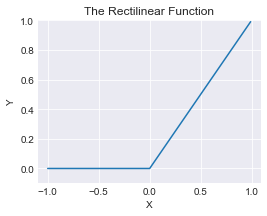

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
## Compute the lectilinear function
def reclu(x): return(max(0,x))
x = [float(x)/100 for x in range(-100, 100)]
y = [reclu(y) for y in x]
## Plot the result
def plot_figs(x,y,title, figsize = (4, 3)):
    plt.figure(figsize=figsize).gca() # define axis
    sns.set_style("darkgrid")
    plt.plot(x, y)
    plt.ylim((-0.1,1.0))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
plot_figs(x,y,'The Rectilinear Function')    

Another widely used activation function is the **logistic** or **sigmoid**. The sigmoid is used as the activation for the output layer of a binary classifier. The general sigmoid function can be written as:

$$\sigma(x) = \frac{L}{1 + e^{-k(x_0-x)}}\\
where\\
L = max\ value\\
k = slope\\
x_0 = sigmoid\ midpoint$$

With $L=1$, $k=1$, and $x_0 = 0$, the logistic function becomes: 

$$\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$$

The sigmoid function can asymptotically approach $0$ or $1$, but will never reach these extreme values. However, because of the rapid decrease in the derivative away from $0$ the sigmoid can **saturate** when using gradient-based training. For this reason, the sigmoid is typically not used for hidden layers in neural networks.   

When used in a the binary classifier a threshold is set to determine if the result is $0$ or $1$. The threshold can be adjusted to bias the result as desired. 

The code in the cell below plots the sigmoid function. 

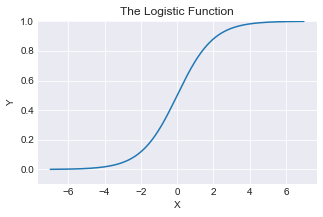

In [62]:
from math import exp
def sigmoid(x): return exp(x)/(1 + exp(x))
x = [float(x)/100 for x in range(-700, 700)]
y = [sigmoid(y) for y in x]
plot_figs(x,y,'The Logistic Function', figsize = (5,3))    

The **softmax** function or **normalized exponential function** is used for the output activation function of a multi-class classifiers. The softmax function is the multinomial generalization of the sigmoid or logistic function. The probability of each class $j$ is written as: 

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

The normalization $\sum_{k=1}^K e^{z_k}$ ensures the sum of probabilities for all classes add to $1.0$. The class selected by the classifier is the class with the largest value of $\sigma(z_j)$.

### 4.3 Computational example

Now that we have gone though some basic theory for feed-forward networks, let's try a simple example. We will construct a fully connected network to compute this simple function:

$$y = x_1 - x_2$$

****
**Comment.** You have likely have noticed that this function is linear and can be computed easily without a neural network. Of course, that is not the point. We use a simple function to make the results easy to understand. 
****

****
**Note.** The neural network for this example does not require any bias terms. 
****

As a first step, we will create test data for 3 cases; $x_1 > x_2$, $x_1 = x_2$, and $x_1 <x_2$

In [63]:
x = [(2,1), (1,1), (1,2)]
for x_in in x:
    print(x_in[0] - x_in[1])

1
0
-1


Now that we have our test data and test cases we can move to the next step. We will create the first weight matrix.

In [64]:
import numpy as np
W_1 = np.array([[1.0, -1.0], [-1.0, 1.0]])
print(W_1)

[[ 1. -1.]
 [-1.  1.]]


We also need the weight vector, for the second set of weights. 

In [65]:
W_2 = np.array([1, -1])
print(W_2)

[ 1 -1]


We have the input cases and the network weights. 

Now, it is time to compute the results and check them. To create the computational process we will follow the graph in Figure 2.6. This particular case is simplified as there are no bias terms. 

The code in the cell below performs the feed forward network computation. The first function computes the matrix product of the weights with the input vector and applies a rectilinear activation function. This function computes the output of the hidden layer given the input vector. 

$$h = \sigma(W^1 \cdot x)$$

The second function computes the vector product of the weight vector with the output vector of the hidden layer which is the output of the network: 

$$o = W^2 \cdot h$$

In [66]:
def hidden(x, W):
    """Computes the output of the hidden layer"""
    h = np.dot(W, x) # product of weights and input vector
    return np.array([reclu(x) for x in h]) # apply activation function and return

def output(h, W):
    """Computes the result for the hidden layer"""
    return np.dot(W, h) # dot product of weight vector and input vector
    
## Run the test cases and check the results     
for y in x:
        h = hidden(y, W_1)
        print(output(h, W_2))

1.0
0
-1.0


Our first fully connected neural network passed all the tests!

Notice that even a network to compute a simple function requires 6 weights. You can see that for more complex functions any practical algorithm must learn a large number of weights. The limitations of Numpy would quickly become evident for large scale problems involving hundreds of millions of weights. 

****
**Note:** If you are having difficulty following the Numpy code in the above example, you might want to look at [Scott Shell's Numpy Tutorial](https://engineering.ucsb.edu/~shell/che210d/numpy.pdf)
****

## 5.0 Learning in neural networks: Backpropagation

Now that we have a promising representation, we need to determine if it is trainable. The answer is not only yes we can, but that we can do so in a computationally efficient manner, using a cleaver algorithm known as **backpropagation**. 

The backpropagation algorithm was developed independently multiple times. The earliest work on this algorithm was by Kelly (1960) in the context of control theory and Bryson (1961) in the context of dynamic programming. Rumelhart, Hinton and Williams (1984) demonstrated empirical that backpropagation can be used to train neural networks. Their paper marks the modern history of neural networks, and set off the first wave of enthusiasm. 

The backpropagation algorithm requires several components. First, we need a **loss function** to measure how well our representation matches the function we are trying to learn. Second, we need a way to propagate changes in the representation through the complex network For this we will use the **chain rule of calculus** to compute **gradients** of the representation. In the general case, this process requires using automatic differentiation methods. 

The point of backpropagration is to learn the optimal weight for the neural network. The algorithm proceeds iteratively through a series of small steps. Once we have the gradient of the loss function we can update the tensor of weights.

$$W_{t+1} = W_t + \alpha \nabla_{W} J(W_t) $$  
where  
$W_t = $ the tensor of weights or model parameters at step $t$.   
$\alpha\ = $ step size or learning rate.  
$J(W) = $ loss function given the weights.  
$\nabla_{W} J(W) = $ gradient of $J$ with respect to the weights $W$.  

It should be evident that the back propagation algorithm is a form of gradient decent. The weights are updated in small steps following the gradient of $J(W)$ down hill. 

Finally, we need a way evaluate the performance of the model. Without evaluation metrics we have no way to compare the performance of a given model, or compare the performance of several models. 

In the next sections, we will address each of loss functions, gradient computation and performance measurement. 

### 5.1 Loss functions

To train a neural network we must have a **loss function**, also known as a **cost function**. In simple terms, the loss function measures the fit of a model to the training data. The lower the loss, the better the fit. 

To train deep learning models **cross entropy** is often used as a loss function. This is an information theoretic measure of model fit. We can understand cross entropy as follows. 

First define **Shannon entropy** as:

$$\mathbb{H}(I) = E[I(X)] = E[-ln_b(P(X))] = - \sum_{i=1}^n P(x_i) ln_b(P(x_i)$$  
Where:  
$E[X] = $ the expectation of $X$.  
$I(X) = $ the information content of $X$.   
$P(X) = $ probability of $X$.  
$b = $ base of the logarithm.    

This rather abstract formula gives us a way to compute the expected information content of a set of values $X$. The more likely (higher probability) of $X$ the less informative it is. 

To create a loss function from the definition of Shannon entropy we start with the **Kullback-Leibler divergence (KL divergence)** or **relative entropy**. The KL divergence is an information theoretic measure of the difference between two distributions, $P(X)$ and $Q(X)$.

$$\mathbb{D}_{KL}(P|Q) = - \sum_{i=1}^n p(x_i)\ ln_b \frac{p(x_i)}{q(x_i)}$$

Ideally, in the case of training a machine learning model we want a distribution $Q(X)$, which is identical to the actual data distribution $P(X)$. 

But, you may say, if we could know $P(X)$ why compute $Q(X)$ at all? Fortunately, we do not have to. We can rewrite the KL divergence as:

$$\mathbb{D}_{KL}(P|Q) = \sum_{i=1}^n p(x_i)\ ln_b p(x_i) - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

Since $P(X)$ is fixed and we wish to find $Q(X)$ when we train our model, we can minimize the term on the right, which is the **cross entropy** defined as:

$$\mathbb{H}(P,Q) = - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

From the formulation of KL divergence above you can see the following.

$$\mathbb{D}_{KL}(P|Q) = \mathbb{H}(P) + \mathbb{H}(P,Q)\\
\mathbb{D}_{KL}(P|Q) = Entropy(P) + Cross\ Entropy(P,Q)$$

Thus, we can minimize divergence by minimizing cross entropy. This idea is both intuitive and computationally attractive. The closer the estimated distribution $q(X)$ is to the distribution of the true underling process $p(X)$, the lower the cross entropy and the lower the KL divergence. 

In general we will not know $p(X)$. In fact, if we did, why would we need to solve a training problem? So, we can use the following approximation.

$$\mathbb{H}(P,Q) = - \frac{1}{N} \sum_{i=1}^n ln_b q(x_i)$$

You may notice, that this approximation, using the average log likelihood, is equivalent to a maximum likelihood estimator (MLE). 

Let's look at a specific case of a model with Gausian likelihood. What is the cross entropy? We can start by thinking about the definition of likelihood. 

$$p(data|model) = p(data|f(\theta)) = p(x_i|f(\hat{\mu},\sigma))= \frac{1}{2 \pi \sigma^2} e^{\frac{-(x_i - \hat{\mu})^2}{2 \sigma^2}}$$

We take the negative logrithm of this likelihood model. 

$$-log\big(p(data|model) \big) = - \frac{1}{2}\big( log( 2 \pi \sigma^2) + \frac{(x_i - \hat{\mu})^2}{2 \sigma^2} \big)$$

Now, the first term on the right is a constant, as is the denominator of the second term if we assume known variance. Since our goal is to minimize cross entropy, we can eleminate these quantities and be left with just the following.

$$-(x_i - \hat{\mu})^2$$

This is one issue we need to deal with. Our formulation of cross entropy involves the unknown true distribution of the underling process $p(X)$. However, since $p(x_i)$ is fixed but unknown we can just write the following.

$$min \big( \mathbb{H}(P,Q) \big) \propto argmin_{\mu} \big( - \sum_{i=1}^n (x_i - \hat{\mu})^2 \big)$$

This is just the definition of a Maximum Likelihood Estimator (MLE) for the least squares problem! In fact, since the cross entropy is computed using the negative log likelihood, it will always be minimized by the MLE. 

You can see another example of [cross-entropy error function and logistic regression](https://en.wikipedia.org/wiki/Cross_entropy).

### 5.2 Computing Loss functions

The loss function is used to train the model. Therefore the loss functon must be computed in an efficient manner. 

Given the number of parameters in deep neural nets over-fitting is inevitable. Therefore some regularization is required. We will discuss regularization in greater depth in another lesson. For now, we will just use the following regularized form.

$$\mathbb{H}(P,Q) = J(\theta) = - \frac{1}{N}\sum_{i=1}^n ln_b q(x_i|\theta) + \lambda ||\theta||^2\\ 
where\\
- \frac{1}{N}\sum_{i=1}^n ln_b q(x_i|\theta) = J_{MLE}(\theta)\\
||\theta||^2 = L^2\ norm\ regularization\ term$$

To minimize $J(\theta)$ in this form $\theta$ must be chosen to keep $||\theta||^2$ small while minimizing the negative log likelihood of $q(x_i|\theta)$.

### 5.3 Chain rule of calculus

Key to the back propagation algorithm is the chain rule of calculus; not to be confused with the chain rule of probability. The chain rule allows us to back propagate gradients though an arbitratily complex graph of functions. 

Now, suppose there is a function $y = g(x)$, and another function $z = f(y) = f(g(x))$. How do we compute the derivative of $z$ with respect to $x$? Appling the chain rule we get: 

$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}$$

Consider $x \in R^M$ $g(x) \Rightarrow R^M$ and $ f(y) \Rightarrow z \in R$. The chain rule becomes:

$$\frac{\partial z}{\partial x} = \sum_j \frac{\partial z}{\partial y_j}\frac{\partial y_j}{\partial x_i}$$

Which we can rewrite as  

$$\nabla_{x}z = \Big( \frac{\partial x}{\partial y} \Big)^T \nabla_{y}z$$

Here, $\frac{\partial x}{\partial y}$ is the $n x m$ **Jacobian matrix** of partial derivatives. The Jacobian is multiplied by the gradient with respect to $y$, $\nabla_{y}z$. You can think of the Jacobian as a transformation for a gradient with respect to $y$ to what we really want, the gradient with respct to $z$.

### 5.4 Example of finding a gradient. 

Let's work out backpropagation for a neural network with a single hidden layer. This neural network with including the loss function is shown in Figure 3.2 below. This network has been highly simplified. There are only two inputs, two hidden units and no bias terms. Further, the hidden units use rectilinear activation and the output unit just uses linear activation. These activation functions have simple partial derivatives.  

![](img/LossGraph.JPG)

<center>**Figure 3.2 
Simple single layer neural network with loss function** </center>

To analyze this network ee will refer to the computational graph shown in Figure 3.1 above. 

We can compute the outputs of the hidden layer as follows.

$$S_{\{1,2\}} = \sigma_h \big( W^1 \cdot X \big)$$  

In the same way, the result from the output layer can be computed as follows, since the activation function for this layer is linear. 

$$S_3 = W^2 \cdot S_{\{1,2\}}$$

To keep things simple in this example we will just use a non-normalized squared error loss function. This is just the MLE estimator for a Gaussian distribution. 

$$J(W) = - \frac{1}{N} \sum_{i=1}^n (y_i - \hat{y_i})^2 $$

Where:  
$y_i = $ the label for the ith case.   
$\hat{y_i} = S_3 =$ the output of the network for the ith case. In other words, the estimated output give the input. 

To perform backpropagation, we need to work out $\frac{\partial E(W)}{\partial W}$ to fill out the Jaobian matrix. With the elements of the Jacobian matrix we can then find the gradient with respect to the weights.  

$$\frac{\partial E(W)}{\partial W} = 
\begin{bmatrix} 
\frac{\partial E(W)}{\partial W^2_{11}} \\
\frac{\partial E(W)}{\partial W^2_{12}} \\
\frac{\partial E(W)}{\partial W^2_{21}} \\
\frac{\partial E(W)}{\partial W^2_{22}} \\
\frac{\partial E(W)}{\partial W^1_{1}} \\
\frac{\partial E(W)}{\partial W^1_{2}}
\end{bmatrix}$$

Given the simple network, it is not too hard to work out the partial derivatives of the gradient. As first example we can work out the partial derivates with respect to the output layers.

$$\frac{\partial E(W)}{\partial W^2_i} = 2(S_3 - y_i) S_i$$

Next, let's take on the gradient for the input weights. 

$$\frac{\partial E(W)}{\partial W^1_{i,j}} = \frac{\partial E(W)}{\partial W^2_i} \sigma^\prime(S_i)$$

\begin{equation}
  =\begin{cases}
    \frac{\partial E(W)}{\partial W^2_i} x_i, & \text{if $S_i>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

A more detailed, but still digestable example of computing gradients for backpropagation can be found in a blog post by [Manfred Zaharauskas](http://blog.manfredas.com/backpropagation-tutorial/), among many other places. 

## 6.0 Performance Metrics

Now that we have the components for traning a basic neural network in place we need a way to evaluate the performance. It turns out, there is nothing special evaluation of neural network models as opposed to other machine learning models. 

For regression models, one typically use the standard metrics such as root mean square error (RMSE), mean absolute error (MAE). 

For classification models, one also typically uses the standard metrics including the confusion matrix, accuracy, precision and recall. 

## 7.0 Bias-variance trade-off

When applying regularization one must come to terms with the **bias-variance trade-off**. Here are some simple examples of extreme cases:

- If we say that our prediction for all cases is just the mean (or median), we have minimized the variance. The estimate for all cases are the same, so the bias of the estimates is zero. However, there is likely considerable variance in these estimates. 
- On the other hand, we can fit the same data with a kNN model with k=1. The training data will fit this model perfectly, since there  is one model coefficient per training data point. The variance will be low. On the other had the model will have considerable bias when applied to test data. 

In either case, these extreme models will not generalize well and will exhibit large errors on any independent test data. Any practical model must come to terms with the trade-off between bias and variance to make accurate predictions. 

To better understand this trade-off let's decompose mean square error, which we can write as:

$$\Delta x = E \big[ Y - \hat{f}(X) \big]$$

Where,
$Y = $ the label vector.  
$X = $ the feature matrix.   
$\hat{f}(x) = $ the trained model.   

Expanding the representation:

$$\Delta x = \big( E[ \hat{f}(X)] - \hat{f}(X) \big)^2 + E \big[ ( \hat{f}(X) - E[ \hat{f}(X)])^2 \big] + \sigma^2\\
\Delta x = Bias^2 + Variance + Irreducible\ Error$$



Regularization will reduce variance, but increase bias. Regularization parameters must be chosen to minimize minimize $\Delta x$. In many cases, this will prove challenging. 

### 7.1 l2 regularization

We will now explore one of the mostly widely used regularization methods, often referred to as l2 regularization. 

The same method goes by some other names, as it seems to have been 'invented' several times. In particular the method is known as, **Tikhonov regularization**, **l2 norm regularization**, **pre-whitening** in engineering, and for linear models **ridge regression**. In all likelihood the method was first developed by the Russian mathematician Andrey Tikhonov in the late 1940's. His work was not widely known in the West since his short book on the subject, [Solution of Ill-Posed Problems](https://www.researchgate.net/publication/44438630_Solutions_of_ill-posed_problems_Andrey_N_Tikhonov_and_Vasiliy_Y_Arsenin), was only first published in english in 1977.

![](img/Tikhonov_board.jpg)
<center> **Figure 2.1   
Commemorative plaque for Andrey Nikolayevich Tikhonov at Moscow State University**


So, what is the basic idea? l2 regularization applies a **penalty** proportional to the **l2** or **Euclidean norm** of the model weights to the loss function. The total loss function then can be written as follows:  

$$J(W) = J_{MLE}(W) + \lambda ||W||^2$$

Where,

$$||W||^2 = \big( w_1^2 + w_2^2 + \ldots + w_n^2 \big)^{\frac{1}{2}} = \Big( \sum_{i=1}^n w_i^2 \Big)^{\frac{1}{2}}$$

We call $||W||^2$ the l2 norm of the weights since we raise the weights to the power of 2, sum and then raise the sum to the $\frac{1}{2}$ power. 

You can think of this penalty as constraining the 12 or Euclidean norm of the model weight vector. The value of $\lambda$ determines how much the norm of the coefficient vector constrains the solution. You can see a view of this geometric interpretation in Figure 2.2 below.  

![](img/L2.jpg)
<center> **Figure 2.2. Geometric view of l2 regularization**

Notice that for a constant value of l2, the values of the model parameters $B1$ and $B2$ are related. For example, if $B1$ is maximized then $B2 \sim 0$, or vice versa. It is important to note that l2 regularization is a **soft constraint**. Coefficients are driven close to, but likely not exactly to, zero.   

****
**What is the difference between the L2 norm and l2 norm?**  Notice that we are discussing the l2 norm with a lower case 'l'. You will often find discussion of the L2 norm with an upper case 'L', or where the l2 and L2 notation are used interchangeability. In practice the difference can be subtle and is often ignored. 

We have already defined the l2 norm as the square root of the sum of the squares of a discrete variable (e.g. a set of weight values). Strictly speaking the L2 norm is the equivalent metric for a continuous function. For example, we can write express the L2 norm of a continuous function $\phi(x)$ as: 

$$||\phi(x)||^2 = \langle \phi(x), \phi(x) \rangle = \int \phi(x)^2 dx$$
****

### 7.2 The eigenvalue penalty interpretation

To develop another view of l2 regularization we can look at the eigenvalue-eigenvector decomposition for a linear model. While neural networks are clearly nonlinear, the behavior is approximately linear locally, particularly near a minimum of the loss function.    

Let's start by examining the **normal equation** formulation of the linear regression problem. The goal is to compute a vector of **model coefficients** or weights which minimize the mean squared residuals, given a vector of data $x$ and a **model matrix** $A$. We can write our model as:

$$x = A b$$

To solve this problem we would ideally like to compute:

$$b = A^{-1}x$$

The commonly used Normal Equation form can help:

$$b = (A^TA)^{-1}A^Tx$$

Now, $A^TA$ is a symmetric $m x m$ covariance matrix. Notice that $A^TA$ is of reduced dimension, equal to the number of model coefficients. But, **$A^TA$ can still be rank deficient!** By rank deficient we mean that there are fewer non-zero eigenvalues of $A^TA$ than the dimension. 

The basic idea of ridge regression is to stabilize the inverse eigenvalue matrix,$D^+$, by **adding a small bias term**, $\lambda$, to each of the eigenvalue. We can write this operation in matrix notation as follows. We start with a modified form of the normal equations (also know as the **L2 or Euclidean norm** minimization problem):

$$min [\parallel A \cdot x - b \parallel + \parallel \lambda \cdot b\parallel]\\  or \\
b = (A^TA + \lambda^2 \cdot I)^{-1}A^Tx\\
b = D_{ridge}^+ A^Tx$$

In this way, the values of small singular values do not blow up when we compute the inverse. You can see this by writing out the $D^+$ matrix with the bias term.

$$D_{ridge}^+  = \begin{bmatrix}
    \frac{1}{d_1 + \lambda^2}  & 0 & 0 & \dots & 0 \\
    0  & \frac{1}{d_2 + \lambda^2} & 0 & \dots & 0 \\
    \vdots &\vdots &\vdots & & \vdots \\
    0 & 0 & 0 & \dots & \frac{1}{d_m + \lambda^2}
\end{bmatrix}$$

Adding this bias term ensures there are no non-zero eigenvalues, and that the inverse of $A^TA$ exists. 

### 7.3 Regularization for regression  

Let's go back to our regression example. Recall that the 9th order polynomial regression model was massively over-fit. Can l2 regularization help this situation? We can create a model applying regularization and find out. 

The code in the cell below using the `Ridge` model from `sklearn.linear_model`. The `Ridge` model has an argument `alpha` which corresponds to the regularization parameter $\lambda$ in the notation we have been using. Execute the code and examine the result. 

1.2240592438232802
[ 1.35924056  0.30472335  0.21513283  0.2553236   0.25085494  0.17711915
  0.04339031 -0.13528087 -0.34506222]


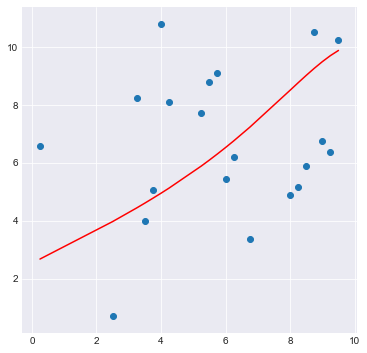

In [67]:
mod_L2 = slm.Ridge(alpha = 1.0)
mod_L2.fit(x_scale, y_train)
y_hat_L2 = mod_L2.predict(x_scale)

print(np.std(y_hat_L2 - y_train))
print(mod_L2.coef_)

plot_reg(x_train, y_hat_L2, y_train)

This model is quite different from the un-regularized one we trained previously. 
- The coefficients are have small values. Some of the coefficients are significantly less than 1. These small coefficients are a direct result of the l2 penalty.
- The fitted curve looks rather reasonable given the noisy data.

Let's test the model on the test data. Execute the code in the cell below and examine the results. 

1.9160891445046229


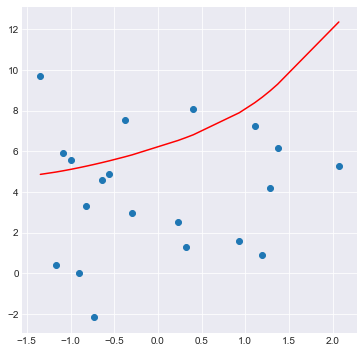

In [68]:
y_hat_L2 = mod_L2.predict(x_scale_test)

plot_reg(x_scale_test[:,0], y_hat_L2, y_test)

print(np.std(y_hat_L2 - y_test))

This result looks a lot more reasonable. The RMSE is nearly the same as for the single feature regression example. Also, the fitted value curve looks reasonable.

In summary, we have seen that l2 regularization significantly improves the result for the 9th order polynomial regression. The coefficients are kept within a reasonable range and the predictions are much more reasonable than the unconstrained model. 

## 8.0 Batch gradient decent for backpropagation

Recall, that we train neural networks using the **backpropagation** algorithm. The backpropagation algorithm requires several components:

1. A **loss function** to measure how well our representation matches the function we are trying to learn. S
2. A method to propagate changes in the representation (weights) through the complex network For this we will use the **chain rule of calculus** to compute **gradients** of the representation. In the general case, this process requires using automatic differentiation methods. 
3. An **optimization algorithm** that uses the gradients to minimize the loss function.  

The backpropagration algorithm learns the optimal weights for the neural network by taking small steps in the direction of the **local gradient**. By *local gradient* we mean the gradient of $J(W)$ computed at each set of weights $W$ as the algorithm proceeds. 

Once we have the gradient of the loss function we can update the tensor of weights using the formulation below.

$$W_{t+1} = W_t + \alpha \nabla_{W} J(W_t) $$  
where  
$W_t = $ the tensor of weights or model parameters at step $t$.   
$\alpha\ = $ step size or learning rate.  
$J(W) = $ loss function given the weights.  
$\nabla_{W} J(W) = $ gradient of $J$ with respect to the weights $W$.  

It should be evident that the back propagation algorithm is a form of gradient decent. The weights are updated in small steps following the local gradient of $J(W)$ down hill. At the **termination condition** $J(W)$ should be at or very near the minimum possible value. 


### 8.1 Computational example

The basic idea is simple, but actually optimizing a complex neural network is another mater altogether. To demonstrate the concept, we will work on a very simple 2-d problem. The loss function in this case is the mean square error (MSE). So, in effect, the minimum MSE is the same as the maximum likelihood (MLE) solution. 

The loss function for a Gaussian process is:

$$J(\hat{x}) = \frac{1}{N} \sum_{i = 1}^{N} \big( \vec{x}_i - \hat{x} \big)^2$$  

where;  
$x = $ the sample data, which is a 2d tensor in this case of dimension $N x 2$ where $N$ is the number of samples,    
$\hat{x} = $ the vector of means we want to estimate.  

We can compute the gradient for each dimension of as follows:

$$\frac{ \partial \hat{x}}{ \partial x_j} = \frac{2}{N} \sum_{i = 1}^{N} \big(  x_{ij} - \tilde{x}_j \big)$$  

where,  
$x_j = $ the jth dimension of $\vec{x}$,   
$x_{ij} = $ the ith component of the jth dimension of $\vec{x}$,   
$\tilde{x}_i = $ is the current estimate of ith component of $\hat{x}$. 


The code in the cell below simulates a bivariate Normal distribution with high covariance between the two dimensions. Execute this code.

In [69]:
cov = np.array([[1.0, 0.99], [0.99, 1.0]])
mean = np.array([1.0, 2.0])

sample = nr.multivariate_normal(mean, cov, 500)
sample.shape

(500, 2)

As already mentioned, for a Gaussian process, the covariance matrix is the inverse the Hessian> This means that both matrices have the same condition number. The code in the cell below computes and displays the eigenvalues of the covariance matrix and the condition number. Execute this code and examine the result. 

In [70]:
import numpy.linalg as nll
eigenvalues = nll.eig(cov)[0]
print('Eigenvalues = ' + str(eigenvalues))
print('The condition number = ' + str(eigenvalues[0]/eigenvalues[1]))

Eigenvalues = [1.99 0.01]
The condition number = 198.99999999999983


The covariance matrix has a high condition number. This optimization problem will deliberately strain the algorithms. 

****
**Note:** In a real-world problem, the condition number can be improved by simple Z-Score scaling. However, for the purpose of demonstration we will skip this step. 
****

Next, execute the code in the cell below to plot the simulated data and examine the result. 

Text(0.5,1,'Sample data')

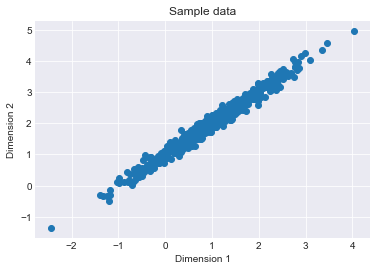

In [71]:
plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

With the simulated data prepared, it is time to try gradient decent! The code in the cell below implements a basic **batch gradient decent** algorithm. This algorithm is considered batch gradient decent since all of the cases are used to compute each update of the gradient. 

The work is done in the `while` loop. The termination condition is the l2 norm of the gradient is less than a set value or the maximum number of iterations has been executed. The learning rate is fixed for each optimization step. An array is output at the end that gives the path history of the optimizer. 

Execute this code and examine the result. 

In [72]:
def compute_gradient(x, estimate):
    mult = 2.0/x.shape[0]
    diff = np.subtract(x, estimate)    
    return mult * np.sum(diff, axis = 0)

def grad_decent(x, estimate, lr, stopping, max_its = 100):
    out = estimate
    out = out.reshape((1,2))
    err = 10000000.0 ## starting criteria for graident metric
    i = 1
    while(err > stopping and i < max_its):
        grad = compute_gradient(x, estimate)
        estimate = estimate + lr * grad
        out = np.append(out, estimate.reshape((1,2)))
        err = np.std(grad)
        i = i + 1
    out = out.reshape((i, 2))    
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    print('MLE = ' + str(out[i-1:]))
    return out

lr = 0.1
stopping = 0.01
#start = np.array([5.0,-1.0])
start = np.array([0.0,0.0])
steps = grad_decent(sample, start, lr, stopping)

Number of iterations = 23
Final gradient value = 0.00930756577652159
MLE = [[0.99266531 1.99434756]]


The optimizer appears to have converged to reasonable values in a small number of steps. The MLE can be compared to the location values used in the simulation, $1.0, 2.0 $.

Next execute the code in the cell below to visualize the trajectory taken by the optimizer. 

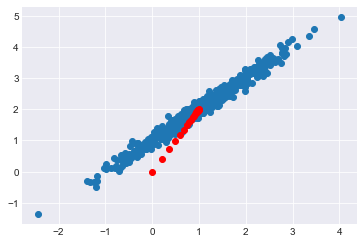

In [73]:
def plot_decent(x, steps):
    plt.scatter(x[:,0], x[:,1])
    plt.scatter(steps[:,0], steps[:,1], color = 'red')

plot_decent(sample, steps)    

The path of convergence looks good. You can see that the rate of convergence of each optimization step decreases as the algorithm approaches convergence. This is expected, since the gradient is decreasing as the optimizer converges.   

### 8.2 Stochastic gradient decent

The **stochastic gradient decent (SGD)** algorithm (Nemirovshi and Yudin, 1978) is the workhorse of deep neural network training. As opposed to batch gradient decent, SGD computes the expected gradient using a **mini-batch** Bernoulli sampled from the full set of cases. Mini-batch optimization is often referred to as **online optimization** since the optimizer algorithm can operate as cases arrive. 

The basic idea of stocastic optimization is that a sample of the data is used to estimate the **expected value** of the weights. The weight update for SGD then becomes:

$$W_{t+1} = W_t + \alpha\ E_{\hat{p}data}\Big[ \nabla_{W} J(W_t) \Big]$$ 

where,  
$E_{\hat{p}data} \big[ \big]$ is the expected value of the gradient given the Bernoulli sample of the data $\hat{p}data$.

Since the SGD algorithm works on mini-batches, it is highly scalable when compaired to the batch gradient decent. The later must keep all cases in memory.  

Choosing batch size can require some  tuning. If the batch is too small, the gradient estimate will be poor. Further, hardware resources will not be fully utilized. Large batches require significant memory. Further, large batches can slow down the compuation of each gradient step.  

Emperically, SGD has good convrgence properties. This may be from the fact that the mini-batch samples alow a better exploration of the loss function space. In fact, for very large datasets the following sampling often converges before the first pass through the data is completed:f

`
Random_sort(cases)
while(grad > stopping_criteria):
    mini-batch = sample_next_n(cases)
    grad = compute_expected_grad(mini_batch)
    weights = update_weights(weights, grad)`
    
Notice that if the sampling continues for more than one cycle through the cases, the samples are biased. In practice, this small bias does not seem to mater much.     

### 8.3 Example of basic SGD

The code in the cell below implements a basic SGD algorithm. The code is nearly identical to the batch gradient decent function. The only difference is the the Bernoulli sampling using `numpy.random.choice`.

Execute this code and examine the result. 

In [74]:
def sgd(x, estimate, lr, stopping, batch_size = 8, max_its = 100):
    out = estimate
    out = out.reshape((1,2))
    err = 10000000.0 #
    # starting criteria for graident metric
    i = 1
    indx = range(x.shape[0])
    while((err > stopping) and (i < max_its)):
        sample_idx = nr.choice(indx, batch_size)
        grad = compute_gradient(x[sample_idx,:], estimate)
        estimate = estimate + lr * grad
        out = np.append(out, estimate.reshape((1,2)))
        err = np.std(grad)
        i = i + 1
    out = out.reshape((i, 2))    
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    print('MLE = ' + str(out[i-1:]))
    return out

lr = 0.1
stopping = 0.01
#start = np.array([5.0,-1.0])
start = np.array([0.0,0.0])
steps = sgd(sample, start, lr, stopping)

Number of iterations = 37
Final gradient value = 0.007967604198915124
MLE = [[0.86782616 1.89022461]]


The SGD algorithm converges to nearly the same result in a similar number of steps as the batch gradient decent algorithm. Using mini-batches has not chnged the result significantly.  

Next, exectue the code in the cell below to visualize the optimization trajectory.  

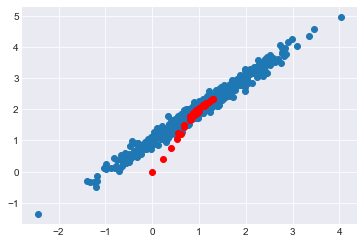

In [75]:
plot_decent(sample, steps)   

Compare the trajectory of the SGD optimizer to the batch gradient decent optimizer. In appears that th SGD optimizer converges faster initally, but then seems to wander a bit near convergance. this makes sense, since the expected gradient from the small mini-batches is likely to be noisier than the batch gradient. 

##### Copyright 2018, Stephen F Elston. All rights reserved